In [1]:
#!pip install graphviz

In [2]:
import pandas as pd
from sklearn import tree
import numpy as np

In [3]:
tree_df = pd.read_csv('output_data/model_data.csv')
tree_df.head()
X = tree_df[["Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","Time to Test (days)","Completion Time (days)",
        "HighSchool", "Assoc","Bach","Masters"]]

In [4]:
trees_df = tree_df.drop(['PrecEducDesc', 'Grade'], axis=1)
trees_df.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),GradePass,HighSchool,Assoc,Bach,Masters
0,2.84,1.0,76.0,0,209.00,591.0,1.0,1.0,0.0,0.0,0.0
1,3.14,1.0,74.7,0,73.00,467.0,1.0,1.0,0.0,0.0,0.0
2,3.22,1.0,75.3,0,84.51,578.0,1.0,1.0,0.0,0.0,0.0
3,3.29,2.0,77.3,0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
4,3.38,2.0,72.7,0,80.33,600.0,1.0,0.0,1.0,0.0,0.0


In [5]:
target = trees_df["GradePass"]
target_names = ["negative", "positive"]

In [6]:
data = trees_df.drop("GradePass", axis=1)
feature_names = data.columns
data.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),HighSchool,Assoc,Bach,Masters
0,2.84,1.0,76.0,0,209.00,591.0,1.0,0.0,0.0,0.0
1,3.14,1.0,74.7,0,73.00,467.0,1.0,0.0,0.0,0.0
2,3.22,1.0,75.3,0,84.51,578.0,1.0,0.0,0.0,0.0
3,3.29,2.0,77.3,0,60.00,591.0,1.0,0.0,0.0,0.0
4,3.38,2.0,72.7,0,80.33,600.0,0.0,1.0,0.0,0.0


In [7]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.749185667752443

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=4)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7752442996742671

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4035872732476163, 'Cum GPA'),
 (0.2038317188434842, 'Time to Test (days)'),
 (0.15306606389685667, 'Completion Time (days)'),
 (0.11513129147954936, 'MaxOfTestScore'),
 (0.0631262541555331, 'TEAS Count'),
 (0.029349733105123295, 'failing grade count'),
 (0.01118715146825503, 'Assoc'),
 (0.008176497845939455, 'Masters'),
 (0.0068160563926766456, 'Bach'),
 (0.005727959564965694, 'HighSchool')]

In [11]:
result = trees_df.values
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,10
0,2.84,1.0,76.0,0.0,209.00,591.0,1.0,1.0,0.0,0.0,0.0
1,3.14,1.0,74.7,0.0,73.00,467.0,1.0,1.0,0.0,0.0,0.0
2,3.22,1.0,75.3,0.0,84.51,578.0,1.0,1.0,0.0,0.0,0.0
3,3.29,2.0,77.3,0.0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
4,3.38,2.0,72.7,0.0,80.33,600.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1220,3.95,1.0,86.0,0.0,101.53,481.0,1.0,0.0,0.0,1.0,0.0
1221,3.64,1.0,77.3,0.0,27.00,481.0,1.0,0.0,0.0,1.0,0.0
1222,3.43,1.0,78.0,0.0,80.00,481.0,1.0,0.0,0.0,1.0,0.0
1223,3.43,1.0,88.0,0.0,72.00,481.0,1.0,0.0,0.0,1.0,0.0


In [12]:
#from sklearn.datasets import load_result
#result = load_result()
#from graphviz import Digraph

In [13]:
# Model (can also use single decision tree)
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=10)

In [14]:
# Train
rf.fit(data, target)
# Extract single tree
estimator = rf.estimators_[5]

In [15]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [16]:
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [17]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

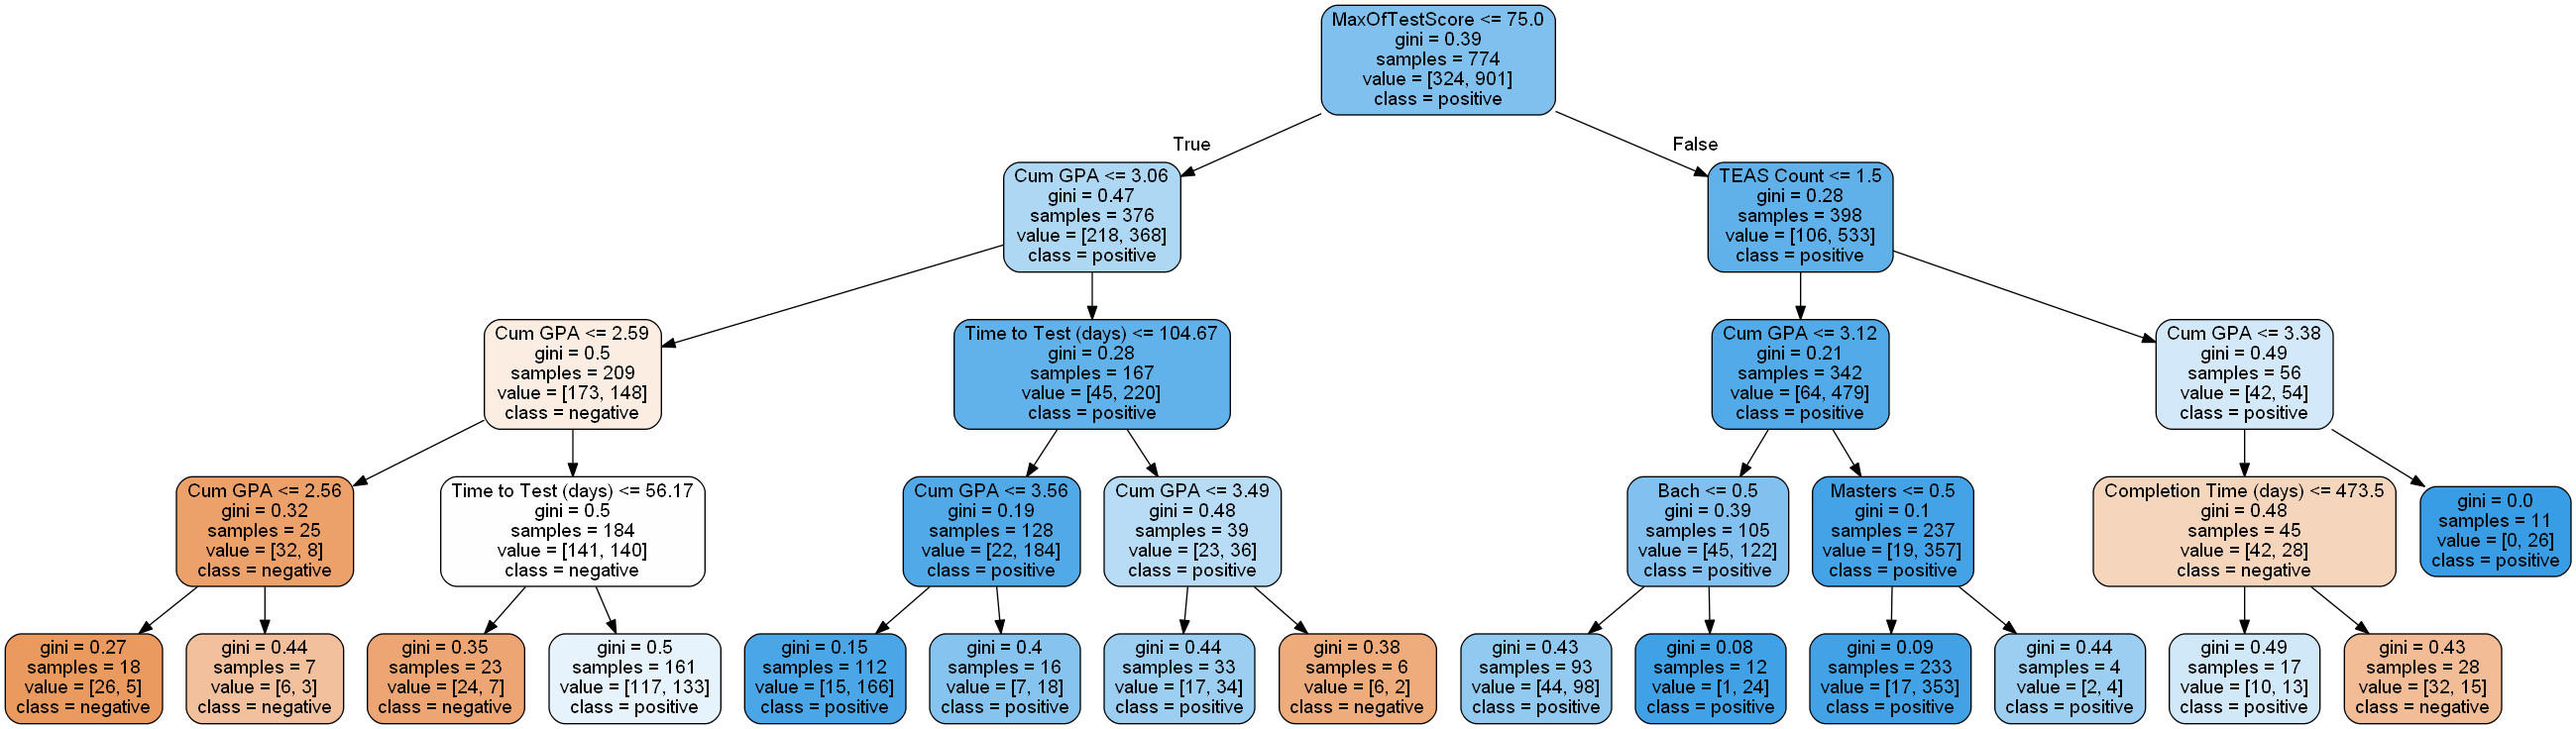

In [18]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [19]:
#from sklearn.tree import export_graphviz
#import six

In [20]:
#export_graphviz(result,
               feature_names=X.columns,
               filled=True,
               rounded=True)

IndentationError: unexpected indent (<ipython-input-20-f245ebd1338c>, line 2)